In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#1. Import Data1.csv file to python.
data = pd.read_csv('Data1.csv')
data.head()

Unnamed: 0   theta_1   theta_2   theta_3   theta_4   theta_5   theta_6
0  2017-01-01  0.756936 -1.467790  0.096136 -0.115306 -0.447908  0.902579
1  2017-01-02  0.767089  0.185797 -1.428536 -0.086443 -0.954288  1.930909
2  2017-01-03  0.404544  1.415887  0.443466  0.000200 -0.892351  2.449691
3  2017-01-04  1.313957 -1.804471 -0.836986  0.011785 -1.012518  1.182085
4  2017-01-05  0.209862  1.315868  0.140993 -0.046473 -1.417092  1.742433

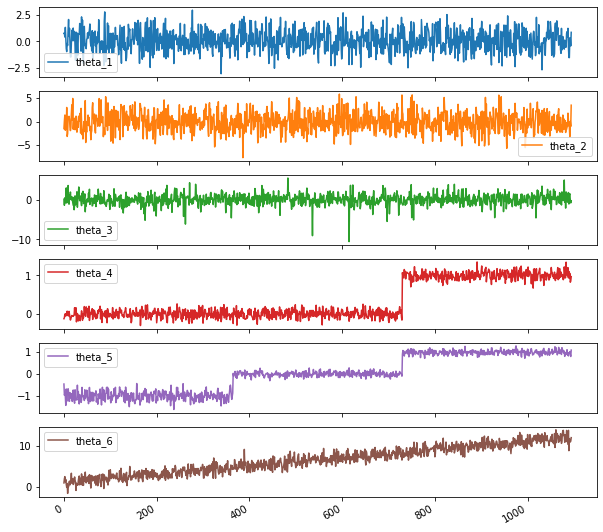

<Figure size 432x288 with 0 Axes>

In [3]:
#2. Set first column as the index.
#3. Plot all columns as time series.
data.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
columns = data.columns
data.head()
data[columns].plot(subplots=True,figsize=(10, 10))
plt.figure()
data = data.set_index('Date')


In [4]:
dataMelted = data.melt()

<Figure size 432x288 with 0 Axes>

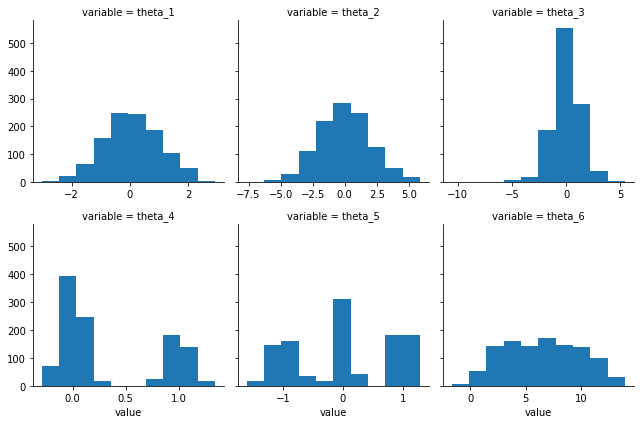

In [6]:
#4. Plot histograms of all columns with auto bin size
plt.figure()
grid = sns.FacetGrid(dataMelted, col="variable", col_wrap=3,sharex=False)
grid.map(plt.hist, "value")

<Figure size 432x288 with 0 Axes>

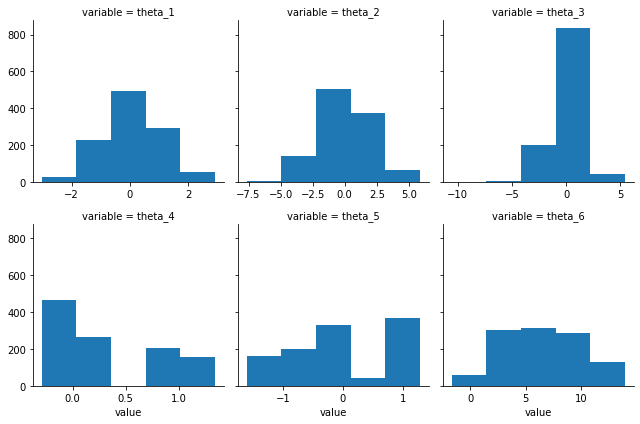

In [7]:
#4. Plot histograms of all columns with bins=5
plt.figure()
grid = sns.FacetGrid(dataMelted, col="variable", col_wrap=3,sharex=False)
grid.map(plt.hist, "value",bins=5)

<Figure size 432x288 with 0 Axes>

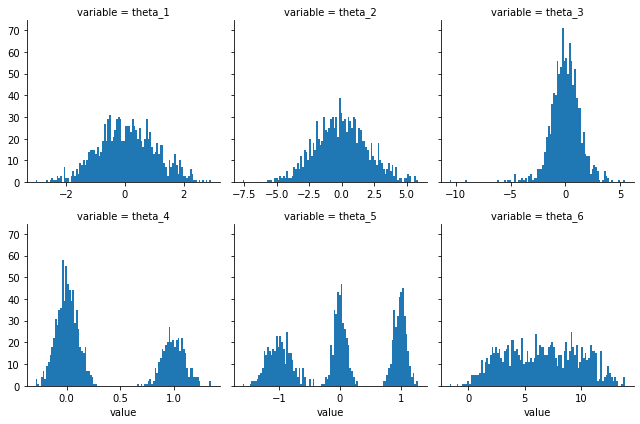

In [8]:
#4. Plot histograms of all columns with bins=100
plt.figure()
grid = sns.FacetGrid(dataMelted, col="variable", col_wrap=3,sharex=False)
grid.map(plt.hist, "value",bins=100)

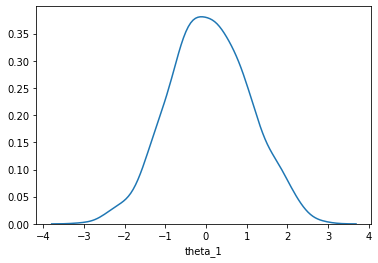

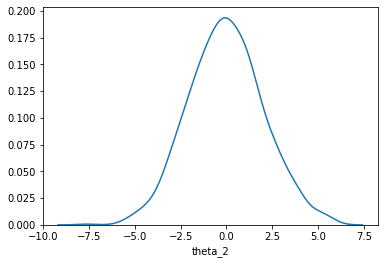

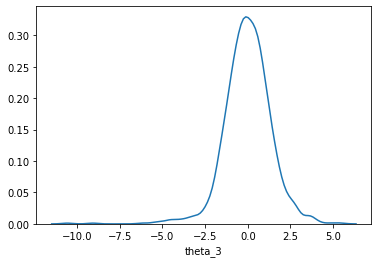

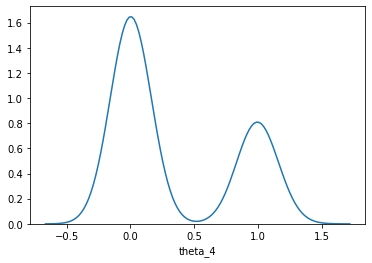

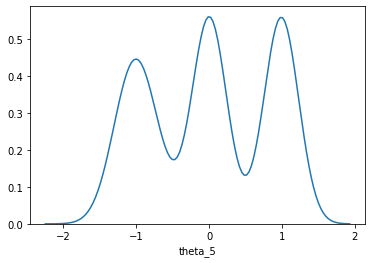

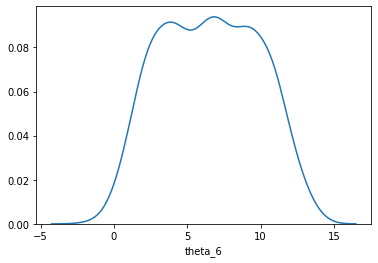

In [60]:
#5 Plot KDE-s
for i in columns[1:7]:
    plt.figure()
    sns.distplot(data[i], kde=True, hist=False)

Index(['theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5', 'theta_6'], dtype='object')


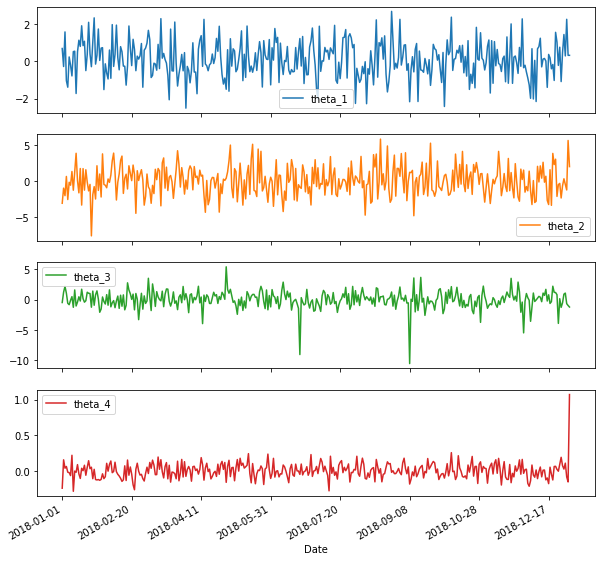

<Figure size 432x288 with 0 Axes>

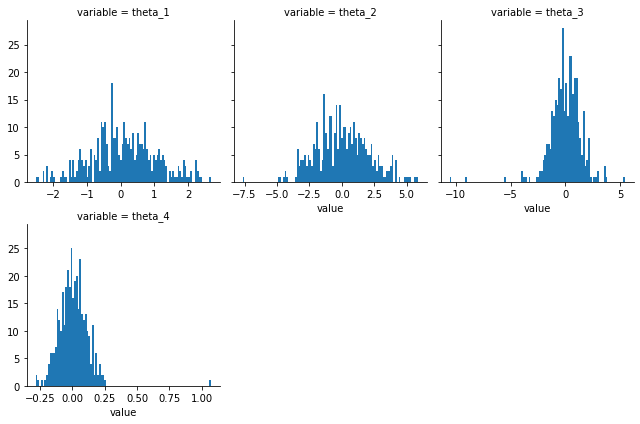

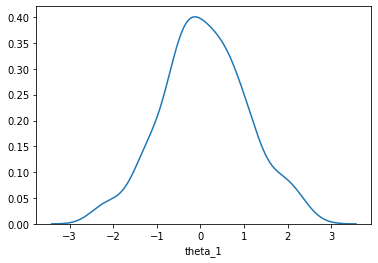

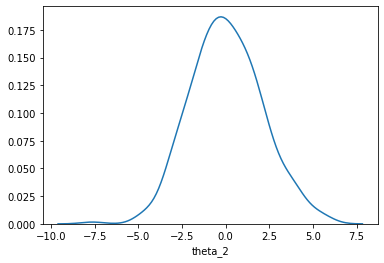

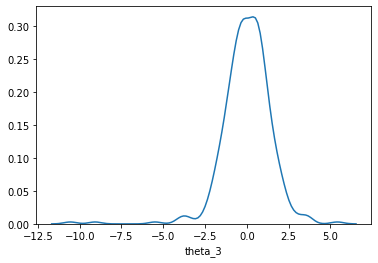

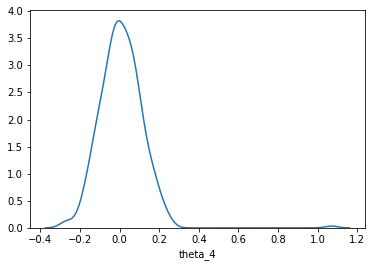

In [9]:
#6. Repeat analysis for columns $\theta_1$-$\theta_4$ in 2018.

data2018 = data['2018-01-01':'2019-01-01']
columns2018 = data.columns
data2018.head() 
print(columns2018)

#6.3. Plot all columns as time series.
data2018[columns[1:5]].plot(subplots=True,figsize=(10, 10))

data2018_hist=data2018[columns[1:5]]
dataMelted2018 = data2018_hist.melt()

#6.4. Plot histograms of all columns
plt.figure()
grid = sns.FacetGrid(dataMelted2018, col="variable", col_wrap=3,sharex=False)
grid.map(plt.hist, "value",bins=100)


#6.5 Plot KDE-s
for i in columns2018[0:4]:
    plt.figure()
    sns.distplot(data2018[i], kde=True, hist=False)    

    


Summary:

#4
Conclusion from point 4 is that verify bin size in histograms is very important.
Shape of our histogram can depend from this value. 
In most cases histogram is better when this value is the highest as possible.
But there is also a risk that we can double some values in one bin. 
For example normally we have 11 bins and we change this value to 12 and in result they can split or doubled into two bins. 

#5
After ploting KDE-s for each columns I realised that KDE plots are very similar to histograms with many bins. In additional KDE of course are normalized. With this plot we can check our choosen bin size (in histogram) if its appropriate. 